# Regression: Review

### Regression is usually referred to the problem of finding a model fit from a given set of measurements. 

#### We get solution for this problem by posing it as a overdetermined system of equations, and solve for the least squares solution. The least square in this formulation means the square of the norm of our residual (error in predicted and measured values)

In the project we have used the recommended QR factorisation pipeline for solving a least squares problem. The formulation of the problem in this case looks like:

[![QR-Axb-pipeline.png](https://i.postimg.cc/dtHdnyrV/QR-Axb-pipeline.png)](https://postimg.cc/kBSBgDT0)

### Relation to Regression

### Examples From Class

Let's suppose that we wish to fit a linear model  $\hat{y}=mx+b$ to the data

Let $$x = \left[\begin{array}{cc}
    x_1\\
    x_2 \\
    \vdots\\
    x_N 
\end{array}  \right]
$$ be a vector of data points that we want to fit in a line 
$$y_i = m x_i +b = \begin{bmatrix} x_i & 1 \end{bmatrix} \begin{bmatrix} m \\ b \end{bmatrix},  ~~1 \le i \le N,$$ 
\begin{equation}
    \label{eq:FirstRegressionModel02}
\underbrace{\begin{bmatrix} y_1 \\ y_2 \\ \vdots \\y_N \end{bmatrix}}_{Y} = \underbrace{\left[\begin{array}{cc}
    x_1 & 1 \\
    x_2  & 1 \\
    \vdots & 1 \\
    x_N & 1
\end{array}  \right]}_{\Phi} \cdot  \underbrace{\begin{bmatrix} m \\ b \end{bmatrix}}_{\alpha},
\end{equation}

We formulate the problem as a regression problem as:

where $Y$ is the vector of $y$-data, $\Phi$ is called the **regressor matrix** and $\alpha$ is the vector of **unknown coefficients** that parameterize the  model.

The error that we are trying to minimize is $||Y-\Phi \alpha ||^2$. From our least squares formulation, we can write a solution $\alpha^*$ as:

 
  $$\begin{equation}
    \label{eq:ThmLeastSqaredErrorSolution2}
  \alpha^\ast = \text{argmin}_{\alpha} ||Y-\Phi \alpha ||^2 \iff \left( \Phi^\top \Phi \right) \alpha^\ast = \Phi^\top Y.
\end{equation}$$

Comparing with equation 9.15 above, we can calculate a least squres solution $\alpha^*$




Let's use this formulation to fit a line to the following data points:

| i   | | $x_i$ | | $y_i$ |
| :-: | | :---: | | :---: |
|<img width=20/>||<img width=50/>||<img width=50/>|
| 1   | | 1     | | 4     |
| 2   | | 2     | | 8     |
| 3   | | 4     | | 10    |
| 4   | | 5     | | 12    |
| 5   | | 7     | | 18    |


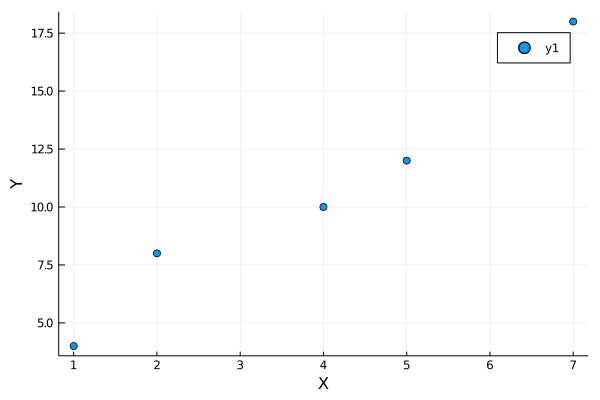

In [2]:
using Plots
gr()

# Given data
X=[1  2  4  5  7]'
Y=[4  8  10  12  18]'
scatter(X,Y, xlabel = "X", ylabel = "Y")

In [3]:
# Run me, don't change me. I will create a back substitution function that you can apply
# to systems of linear equations with an upper triangular "A" matrix, that we denote by U

"""
backwardsub(U, b)

It solves for x in an equation Ux = b, where U is upper triangular.
"""
function backwardsub(U, b)
    
    # Assert no entries in the diagonal of U
    # are 0 (or very close to 0)
    @assert minimum(abs.(diag(U))) > 1e-6
    
    n = length(b)
    x = Vector{Float64}(undef, n)

    x[n] = b[n] / U[n,n]
    for i in n-1:-1:1
        x[i]=(b[i] - (U[i,(i+1):n])' * x[(i+1):n]) ./ U[i,i]
    end
    
    return x    
end

backwardsub

# Linear Regression

The given set of measurements look like they could be fit into a line. The basis is that case the simple linear basis: $\begin{bmatrix} x_i & 1 \end{bmatrix}$. 

This is called Linear Regression. 



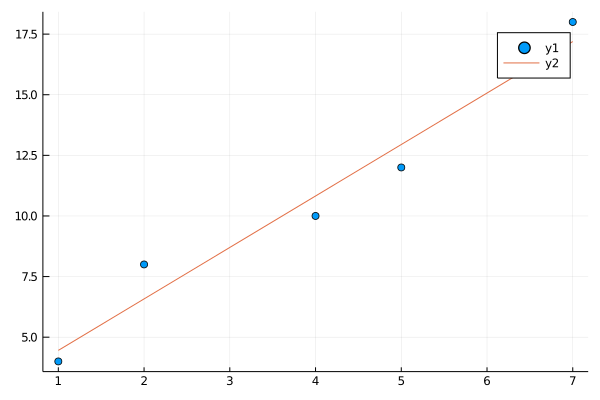

In [14]:
using LinearAlgebra
### Solution Code Here 

phi = [X ones(5,1)]

qr_phi = qr(phi);
Q = Matrix(qr_phi.Q)
R = qr_phi.R

b_bar = Q'*Y
alphaStar = backwardsub(R,b_bar)

Y_hat = phi*alphaStar

plot!(Y_hat)

XX = 1:7;
Phi_hat = [XX ones(7,1)];

YY_hat = Phi_hat*alphaStar

scatter(X,Y);
plot!(YY_hat)


# Monomial Regression

Linear fit cannot describe more complex curves, in which case we want to use monomial basis instead, that give us the curves from the square, cube etc. terms. Let us see an example for this, that we took in class. 

| i   | | $x_i$ | | $y_i$ |
| :-: | | :---: | | :---: |
|<img width=20/>||<img width=50/>||<img width=50/>|
|1 | |0|  | 1.0|
|2 | |0.25|    |  1.0|
|3 | |0.5| |1.5 |
|4 | |0.75| | 2.0| 
|5 | | 1.0| |3.0 |
| 6 || 1.25| |4.25|
|7| |1.5 | |5.5|
|8| |1.75 |  | 7.0 |
|9| | 2.0|   | 10.0 |


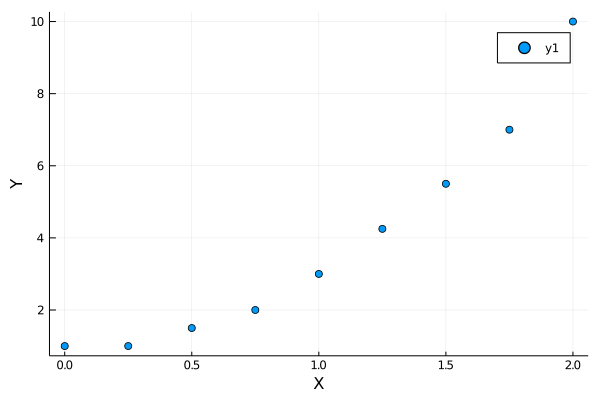

In [40]:
dataSet2=[
3 1 0.0 1.0
4 2 0.25 1.0
5 3 0.5 1.5
6 4 0.75 2.0
7 5 1.0 3.0
8 6 1.25 4.25
9 7 1.5 5.5
10 8 1.75 7.0
11 9 2.0 10.0];
X= dataSet2[:,3];
Y = dataSet2[:,4];

scatter(X,Y, xlabel = "X", ylabel = "Y")

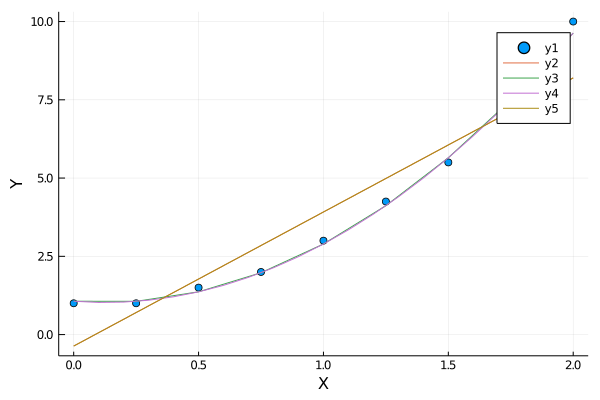

In [45]:
### Solution code here

phi = [X ones(9,1)]

qr_phi = qr(phi);
Q = Matrix(qr_phi.Q)
R = qr_phi.R

b_bar = Q'*Y
alphaStar = backwardsub(R,b_bar)

Y_hat = phi*alphaStar

plot!(X,Y_hat)

# XX = 0.0:0.1:2.0;
# Phi_hat = [XX ones(length(XX),1)];

# YY_hat = Phi_hat*alphaStar

# scatter(X,Y);
# plot!(YY_hat)
display(plot!())

In [46]:
error_linear = norm(Y-Y_hat)^2

7.6989583333333345

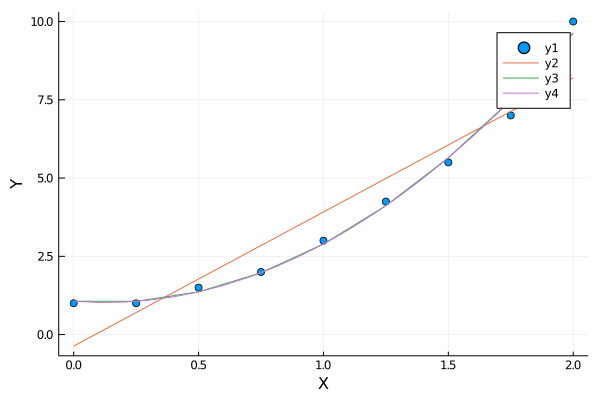

In [42]:
## Monomial Fitting

phi = [X.^2 X ones(9,1)];

qr_phi = qr(phi);
Q = Matrix(qr_phi.Q)
R = qr_phi.R

b_bar = Q'*Y
alphaStar = backwardsub(R,b_bar)

Y_hat = phi*alphaStar

plot!(X,Y_hat)

XX = 0.0:0.1:2.0;
Phi_hat = [XX.^2 XX ones(length(XX),1)];

YY_hat = Phi_hat*alphaStar

plot!(XX,YY_hat)
display(plot!())

In [43]:
error_monomial = norm(Y-Y_hat)^2

0.4503787878787874

### Extra examples

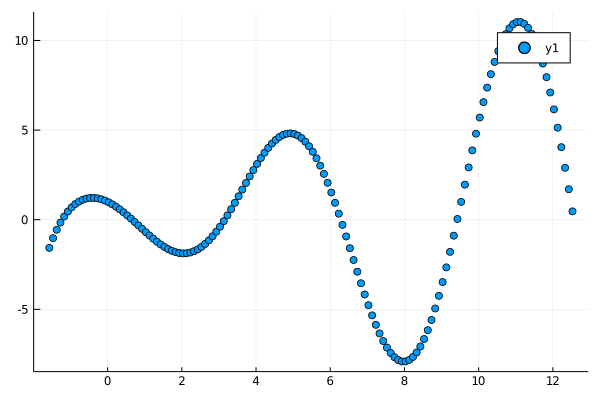

In [67]:
using Random

Random.seed!(14);
x_actual = -pi/2:0.1:4*pi;
y_actual = x_actual.*sin.(-x_actual).+cos.(x_actual).*exp.(-x_actual);
scatter(x_actual, y_actual)

N = Int(length(x_actual) / 2) = 71
N = length(idx) = 59


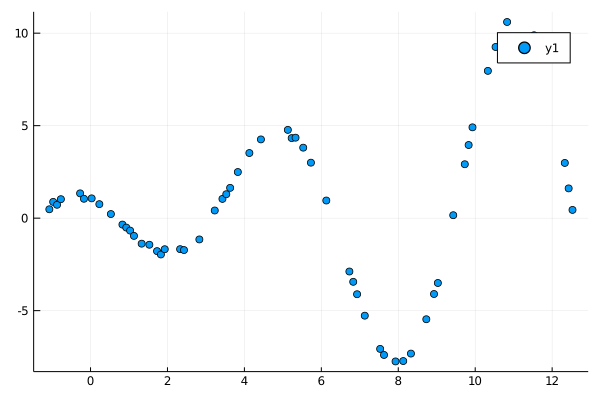

In [68]:
@show N = Int(length(x_actual)/2);

idx = Int.(unique(floor.(rand(N) * length(x_actual))) .+ 1) # random indices
@show N   = length(idx);

x_measured = x_actual[idx]; # Training input

# Noise from a scaled normal distribution
y_measured = y_actual[idx] + 0.1 * randn(N)

new_idx = sortperm(x_measured);
y_measured = y_measured[new_idx];
x_measured = x_measured[new_idx];

scatter(x_measured,y_measured)

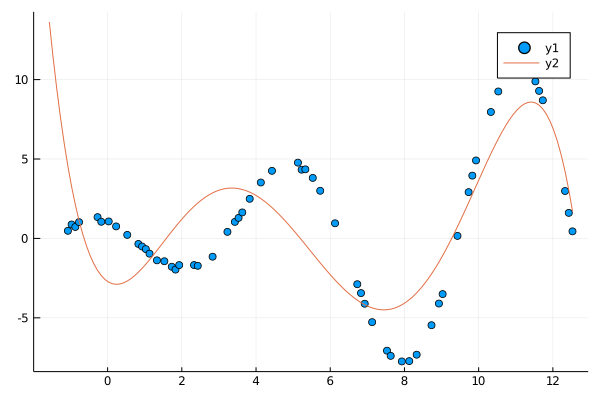

In [69]:
phi = [x_measured.^5 x_measured.^4 x_measured.^3 x_measured.^2 x_measured ones(length(x_measured),1)];

qr_phi = qr(phi);
Q = Matrix(qr_phi.Q)
R = qr_phi.R

b_bar = Q'*y_measured
alphaStar = backwardsub(R,b_bar)

Y_hat = phi*alphaStar

# plot!(x_measured,Y_hat)
Phi_hat = [x_actual.^5 x_actual.^4 x_actual.^3 x_actual.^2 x_actual ones(length(x_actual),1)];
YY_hat = Phi_hat*alphaStar

plot!(x_actual,YY_hat)
# display(plot!())

In [70]:
error_monomial = norm(y_measured-Y_hat)^2

421.7139210542504

## Radial Basis Functions

$$f(x; x_c, s) = exp(\frac{-\|x-x_c\|^2}{2s^2})$$

The equation above is the formula for a generic Radial Basis Function (RBF). $x$ and $x_c$  are vectors in $\mathbb{R}^n$.

$x_c$ gives the center and $s$ gives the width of the bell curve. 

For the current problem, it looks like we will need 5 bell curves. We can for this case handpick our centers, and a width and try to find the coefficients, $a_0, a_1, a_2, a_3, a_4, a_5$. the prediction is this case will be given as:

$$\hat{y} = a_0 + a_1 f(x; x_{c_1}, s) + a_2 f(x; x_{c_2}, s) + ... + a_{5} f(x; x_{5}, s)$$


In [76]:
# Run me, don't change me. I will create a function
# will be helpful in assembling our Φ matrix assuming
# our model is a linear combination of RBFs

"""
function calc_phi_row(x, centers, s)

Returns a single row in the Φ matrix

Inputs:
    xᵢ      - the measurment xᵢ
    centers - a Mx1 vector holding the centers of the determined RBFs
    s       - the shared kernel width (RBF width)
"""
function calc_phi_row(xᵢ, centers, s)
   
    phi_row_size = length(centers) + 1
    phi_row = Array{Float64, 1}(undef, phi_row_size)
    phi_row[1] = 1
    
    for i in 2:phi_row_size
        phi_row[i] = rbf(xᵢ, centers[i-1], s)
    end
    
    return phi_row
end

calc_phi_row

In [77]:
# Run me, don't change me. I will create a function
# that returns the regressor matrix Φ based on our
# model using RBFs as basis functions

"""
function regressor_matrix()

Returns the regressor matrix Φ

Inputs:
    X       - a Nx1 vector holding the X value of all the measurements
    centers - a Mx1 vector holding the centers of the determined RBFs
    s       - the shared kernel width (RBF width)
"""
function regressor_matrix(X, centers, s)
    
    N = length(X)
    M = length(centers)
    phi = Array{Float64, 2}(undef, N, M+1)
    
    for i in 1:N
        phi[i, :] = calc_phi_row(X[i], centers, s)'
    end
    
    return phi
end

regressor_matrix

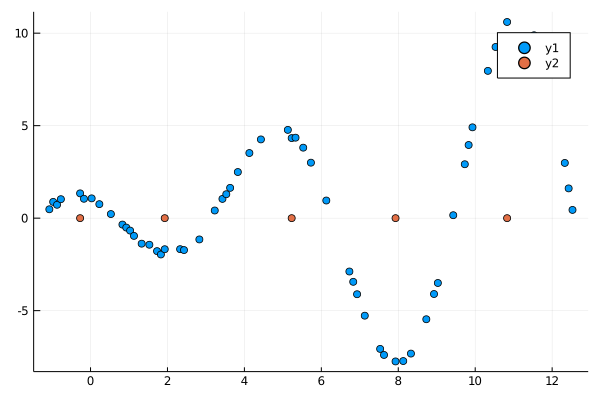

In [78]:
x_centers = [5, 18, 30, 41, 53];

x_c = x_measured[x_centers];

scatter(x_measured,y_measured);
scatter!(x_c, zeros(5,1))

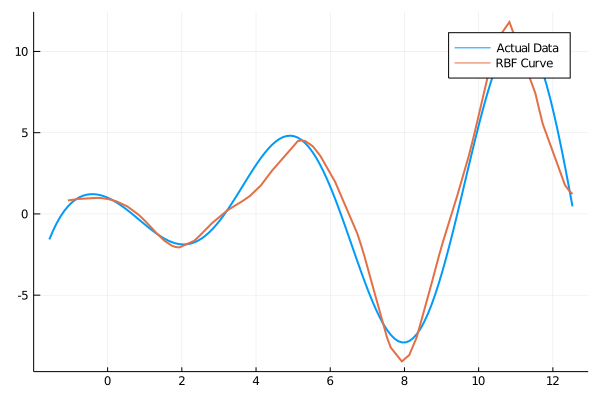

In [89]:
rbf(x1, xc, s) = exp.(-norm(x1-xc)^2 / (2*s^2))

### Begin Solution 

s = 0.7;

phi = regressor_matrix(x_measured, x_c,s)

qr_phi = qr(phi);
Q = Matrix(qr_phi.Q)
R = qr_phi.R

b_bar = Q'*y_measured
alphaStar = backwardsub(R,b_bar)

Y_hat = phi*alphaStar
plot(x_actual,y_actual, label = "Actual Data", linewidth = 2)
plot!(x_measured,Y_hat, label = "RBF Curve", linewidth = 2)

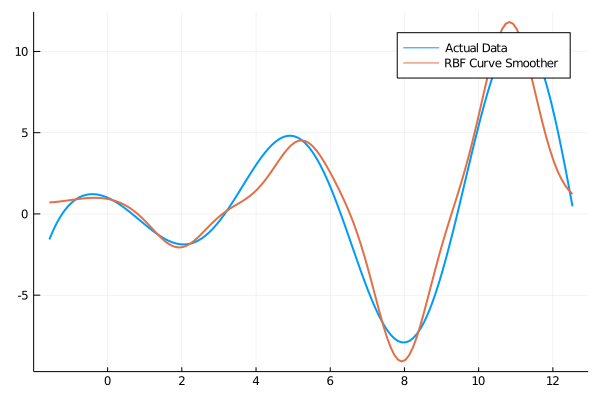

In [90]:
Phi_hat = regressor_matrix(x_actual, x_c,s)
YY_hat = Phi_hat*alphaStar
plot(x_actual,y_actual, label = "Actual Data", linewidth = 2)
plot!(x_actual,YY_hat, label = "RBF Curve Smoother", linewidth = 2)

In [91]:
error_rbf = norm(y_measured - Y_hat)^2

64.45169556135096